In [1]:
'''

Este notebook tem por objetivo apresentar uma demo das funcionalidades presentes na Python API para administração
do Portal/AGOL da organização

O primeiro passo é importar o módulo da API

'''

from arcgis.gis import GIS


In [35]:
'''

Para ter acesso às funções é preciso realizar o login. 

Para ter acesso à todas funcionalidades deve-se logar com o usuário administrador.

A Python API fornece diversas formas de realizar a autenticação, como OAuth 2.0, por exemplo
https://developers.arcgis.com/python/guide/working-with-different-authentication-schemes/

'''

gis = GIS("url portal/AGOL", "usuario", "senha")

In [36]:
'''

Depois de realizado o login, é possível acessar os métodos relacionados ao usuário logado

'''

gis.users.me

<User username:admin>

In [37]:
'''

Um exemplo de método é a verificação do papel na organização pertencente ao usuário logado

'''

gis.users.me.role

'org_admin'

In [11]:
'''

Através da API é possível criar papéis dentro da organização informando o nome, uma descrição 
e os privilégios que os usuários com esse papel terão.

'''


privilege = ['portal:publisher:publishTiles',
                 'portal:user:createItem',
                 'portal:user:joinGroup']

gis.users.roles.create(name="Gerenciador de Mapas", 
                      description="Irá gerenciar os mapas da organização",
                      privileges=privilege)

<Role name: Gerenciador de Mapas, description: Irá gerenciar os mapas da organização>

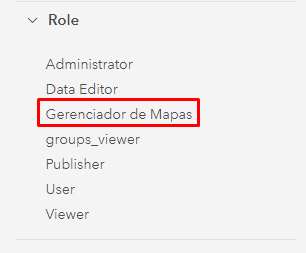

In [14]:
# Role criado no Portal

from IPython.display import Image
Image("Roles.png")

In [60]:
'''

Da mesma forma que é possível criar novos usuários.

'''

user = gis.users.create(username = 'user_test',
                      password = 'senha@12345',
                      firstname = 'Usuário',
                      lastname = 'Teste',
                      email = 'teste@esri.com',
                      description = 'Demonstração de como criar um usuário no Portal via Python',
                      role = 'Viewer',
                      level = 1,
                      user_type = 'viewer',
                      provider = 'arcgis')

user

<User username:user_test>

In [ ]:
'''

A criação de usuários depende das licenças disponíveis. 
Quando não houver licenças, a API retornará um erro

'''

In [61]:
'''

A API também permite excluir usuários. Para isso é necessário seguir um passo primeiro:

Assegurar-se de que o conteúdo pertencente àquele usuário seja repassado para um novo.


Portanto, podemos instanciar o usuário que queremos excluir, ter acesso aos itens dele, 
copiá-los para outro local e então excluir a conta.

'''

# Instanciando o usuário 
user_test = gis.users.get('user_test')

# Lendo todos os itens pertencentes ao usuário
items = user_test.items()

items[0].title

'testeAPI'

In [63]:
# Repassando o item para um novo usuário

items[0].reassign_to(target_owner = 'admin', target_folder= 'DEV')

True

In [51]:
# Por fim, podemos deletar a conta do usuário

user_test.delete()

True

In [ ]:
'''

A Python API fornece uma gama de funcionalidades para a administração do Portal/AGOL.
O que vimos foi apenas uma amostra das otimizações que são possíveis.
Para visualizar outras funcionalidades da API acesse a documentação oficial da ESRI https://developers.arcgis.com/python/api-reference 

'''